In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/filaments_ddp1_g15.csv")

In [3]:
def summary_filament(data_filaments, id_filament):
    # define a coordinate system from the data_filaments
    los_vector_hat = np.array([np.sum(data['x_fila']), np.sum(data['y_fila']), np.sum(data['z_fila'])])
    los_vector_hat = los_vector_hat/np.sqrt(np.dot(los_vector_hat, los_vector_hat))
    perp_los_vector_hat_A  = np.array([-los_vector_hat[1], los_vector_hat[0], 0])
    perp_los_vector_hat_B = np.cross(los_vector_hat, perp_los_vector_hat_A)
    
    ii = np.int_(data_filaments['id_fila'])==id_filament
    coordinates = np.array(data_filaments[['x_fila','y_fila', 'z_fila']][ii])
    
    n_points = len(coordinates)
    #print(n_points)
    mu_par = np.zeros(n_points-2)
    mu_perp_A = np.zeros(n_points-2)
    mu_perp_B = np.zeros(n_points-2)
    filament_len = 0
    for i in range(1,n_points-1):
        r_center = coordinates[i]
        r_left = coordinates[i-1]
        r_right = coordinates[i+1]
        delta_r = r_right - r_left
        delta_r_hat = delta_r / np.sqrt(np.dot(delta_r, delta_r))
        r_center_hat = r_center / np.sqrt(np.dot(r_center, r_center))
    
        filament_len +=  np.sqrt(np.dot(delta_r, delta_r))
    
        r_par = r_center_hat * np.dot(delta_r, r_center_hat)
        r_perp = delta_r - r_par
        mu_par[i-1] = np.dot(delta_r_hat, r_center_hat)
        mu_perp_A[i-1] = np.dot(delta_r_hat, perp_los_vector_hat_A)
        mu_perp_B[i-1] = np.dot(delta_r_hat, perp_los_vector_hat_B)
    return mu_par, mu_perp_A, mu_perp_B, np.ones(n_points-2)*filament_len

In [64]:
data = pd.read_csv("../data/p_web_rosette_17_filaments.csv")

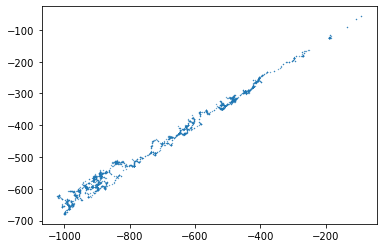

In [65]:
plt.scatter(data['x_fila'], data['y_fila'], s=0.1)

In [66]:
id_filaments = np.array(list(set(data['id_fila'])), dtype='int')
mu_par = np.empty((0))
mu_perp_A = np.empty((0))
mu_perp_B = np.empty((0))
filament_len = np.empty((0))
for id_fil in id_filaments:
    mu_par_tmp, mu_perp_A_tmp, mu_perp_B_tmp, len_tmp = summary_filament(data, id_fil)
    mu_par = np.append(mu_par, mu_par_tmp)
    mu_perp_A = np.append(mu_perp_A, mu_perp_A_tmp)
    mu_perp_B = np.append(mu_perp_B, mu_perp_B_tmp)
    filament_len = np.append(filament_len, len_tmp)

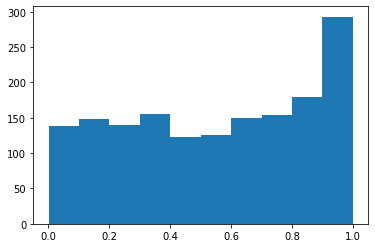

In [67]:
_ = plt.hist(np.abs(mu_par))

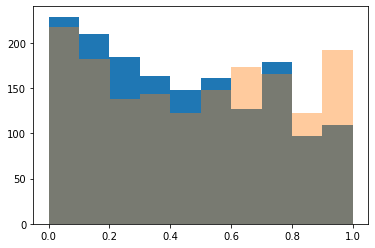

In [69]:
ii = (filament_len<300) & (filament_len>0)
_ = plt.hist(np.abs(mu_perp_A[ii]))
_ = plt.hist(np.abs(mu_perp_B[ii]), alpha=0.4)

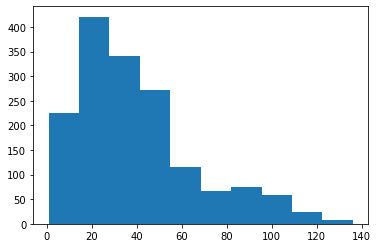

In [70]:
_ = plt.hist(filament_len)

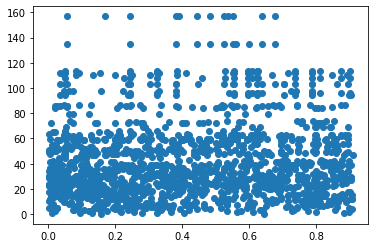

In [60]:
plt.scatter(np.abs(mu_perp_A), filament_len)

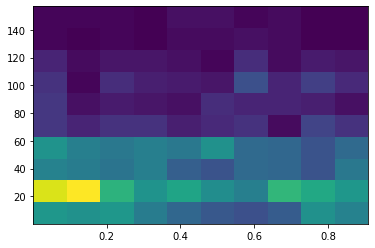

In [61]:
_ = plt.hist2d(np.abs(mu_perp_A), filament_len)

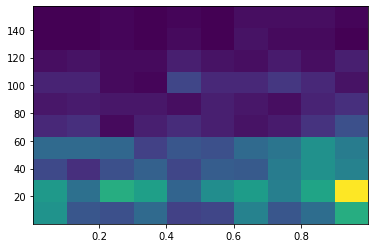

In [62]:
_ = plt.hist2d(np.abs(mu_par), filament_len)

(-309.143575, -46.406925, 92.70575000000001, 554.3812499999999)

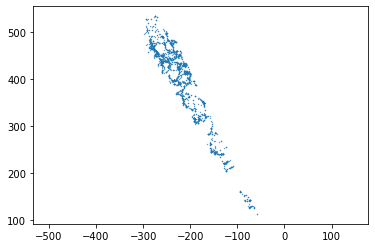

In [63]:
plt.scatter(data['y_fila'], data['z_fila'], s=0.1)
plt.axis('equal')

(array([319., 434., 327., 212., 106.,  30.,  25.,   0.,  14.,  33.]),
 array([  0.69810489,  17.83508866,  34.97207242,  52.10905619,
         69.24603995,  86.38302372, 103.52000748, 120.65699125,
        137.79397501, 154.93095878, 172.06794254]),
 <BarContainer object of 10 artists>)

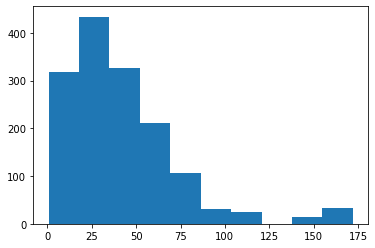

(32.4, 683.6, 15.502049999999997, 532.45695)

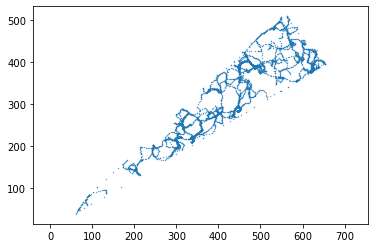

In [73]:
plt.scatter(data['x_fila'], data['y_fila'], s=0.1)
plt.axis('equal')